### 1. Explain the whole intuition behind the Hypothesis testing.

**Hypothessis testing (or Significance testing) allows us to make inferences whether the data at hand sufficiently supports a particular hypothesis.**
<br><br>
Let me explain it with an example.
<br><br>
Say, I'm having a website which currently uses a light colored background and **I have statistics (from a sample, say n=100) of people spending time on my website say Mu = 20mins**. Now, I wanna test if by changing the background color whether there's gonna be any change in Mu or not.
So the Hypothesis testing goes like this:

- First off all, we are to assume two hypotheses viz **Null Hypothesis (H0)** and **Alternate Hypothesis (Ha)**.
<br><br>
- Null Hypothesis is kinda skeptics hypothesis. It goes by the belief of cynics or skeptics. It assumes that no matter what you change there's gonna be no difference.
<br>In our case, Ho will be Mu=20 mins even after changing the bg color of my website.
<br><br>
- Say the new Mu we have by going with the **Alternate Hypothesis (Ha)** is 25mins.
<br><br>
- Now, we are to calculate the probabilty of the statistics we get in Ha but assuming our H0 to be true i.e what's the probability of getting Mu=25 mins assuming the null hypothesis to be true? That's gonna bre our **p-value** which can be interpreted as probability of the null hypothesis to be true.
<br><br>
- Now there is gonna be other value which is to be predecided by the domain expertise -- **alpha (threshold or significance value) that is nothing but a tolerance of the null hypothesis to be true.**
At this time, if the **p-val < alpha**, then we are good to go with the null hypothesis or else we are gonna go with our alternate hypothesis.
<br><br>
Say, with CLT and the z-score we get our **p-val = 0.03** but the tolerance is **.05**, then it emphasizes the point that there is no change in people spending time on my website even after changing the bg to dark. Then there's no point of changing it in the first place and thus we reject the null hypothesis.

<br><br><br>
- **The null hypothesis is the statement that a difference does not exist between the distribution of the two samples of data; that any variance is seen due to noise or chance.**
- **In terms of machine learning, our null hypothesis is that the performance metrics are equal, that any small gain, or loss, observed is not statistically significant.**

### 2. What kind of statistical tests you have performed in your ML Application
**Hypothesis testing** and **P-value**

### 3. What do you understand by P Value? And what is use of it in ML?

In hypothesis testing when we are to assume two hypotheses viz. Null and Alternate for a given situation at hand, there **p-value** is the probability of the null-hypothesis to be true.
<br><br>It is to be compared to the **significance value i.e alpha i.e tolerance for the null hypothesis to be true** and if it is less than the alpha, then alternate hypothesis takes precedence otherwise vice-versa.

### 4. Which type of error is severe Error, Type 1 or Type 2? And why with example.

First and foremost let's see what even are these errors.
<br><br>
**Type-I error (False Positives):** In significance or hypothesis testing, when in reality the null hypothesis is true (often 5% of the times based on the **alpha**), however we happen to reject it on the sample size we've had and make that inference on the whole population, we are making the **Type-I error**.

**Type-II error (False Negatives):** At the same time, if in reality the H0 is false and we failed to reject it, we are so making the **Type-II error**.

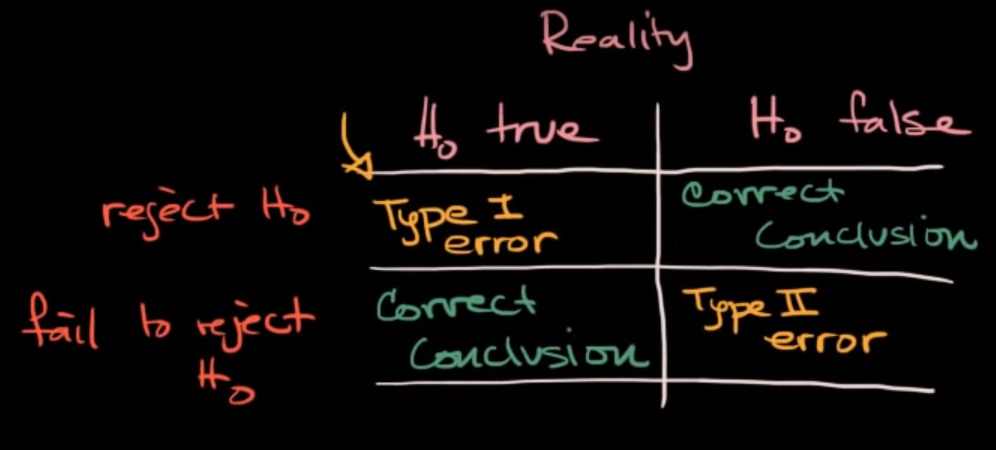

Now, back to the question: The **type I** error is considered to be more worse because to reject what is True is more harmful than keeping the data that's not True. This was according to Byju.
<br><br>
According to me, this notion is very subjective. Consider the case where a person is having ccancer. What will be more worse, **telling him he's having cancer while actually he's not (true negative)** or **letting him know he's not having cancer, he's having, however (false positive)?** I think you've got your answer.

### 5. Where we can use chi square and have you used this test anywhere in your application?

Chi-square test is a statistical test for categorical data. It thas two use cases:

* **Goodness of fit:** To test how well the theoretical distribution explains the observed ones.
    <br>Ex: Suppose, I want to own a restaurant and I went to my acquaintence (who already owns a restaurant) to ask the percentage of people coming on weekdays. But I am not convinced by the stats given by him. So I decided to record those stats by myself.
    <br><br>Now to check whether the owner's distribution is correct, we are to assume two hypotheses, The H0 being the owner's observation being correct and Ha being he lied. Now since the data we are having here is categorical, we can use the **Chi-square test** and via the chi-square statistic decide whether to accept or reject thenull hypothesis.
    <br><br>
* **Test of Independence:** To determine whether there is significant assosciation bw two variables.<br><br>
    <br>Ex: Suppose a flu passed by and there are group of infected people which were to take medicines --Herb1, Herb2 and the placebo. Now, the govt. wanna test whether taking them have had an actual impact to the people i.e. they remained sick or they healed.
    <br>Chi-square test of independence can be implemented here by assuming two hypotheses.

### # An example implementing the Chi2 test:

In [9]:
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats

df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#### Does sex of the passenger has a role to playin the survival status of the passenger?

In [5]:
tab = pd.crosstab(index=df["sex"], columns=df["alive"])
tab

alive,no,yes
sex,,
female,81,233
male,468,109


<AxesSubplot:xlabel='alive', ylabel='count'>

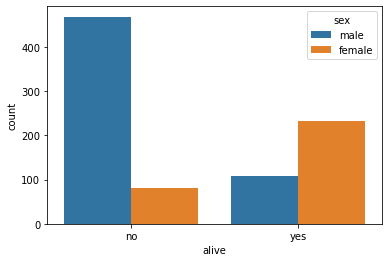

In [6]:
sns.countplot(data=df, x="alive", hue='sex')

In [8]:
## observed vals

ovals = tab.values
ovals

array([[ 81, 233],
       [468, 109]], dtype=int64)

In [25]:
x, y, z, exvals = stats.chi2_contingency(tab)
x, y, z, exvals

(260.71702016732104,
 1.1973570627755645e-58,
 1,
 array([[193.47474747, 120.52525253],
        [355.52525253, 221.47474747]]))

In [18]:
### Calculating chi2 stat

chi2 = sum(sum([ (o-e)**2/e for o,e in zip(ovals, exvals)]))
print(f"Chi2 stat: {chi2}")

Chi2 stat: 263.05057407065567


#### tolerance: alpha = 0.05

In [24]:
## Critical Val

alpha = 0.05
dof = (tab.shape[0]-1) * (tab.shape[1]-1)
print(f"dof: {dof}")

print(f"Critical val: {stats.chi2.ppf(1-alpha, dof)}")

dof: 1
Critical val: 3.841458820694124


In [28]:
## p-val

p_value = 1-stats.chi2.cdf(x=chi2, df=dof)

print('Significance level, alpha: ',alpha)
print('Degree of Freedom: ',dof)
print('p-value:',p_value)

Significance level, alpha:  0.05
Degree of Freedom:  1
p-value: 0.0


In [29]:
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Reject H0,There is a relationship between 2 categorical variables


### 6. Can we use Chi square with Numerical dataset? If yes, give example. If no, give reason?

The whole point of the Chi-square test is to test whether two categorical variables are related or not. The chi-square test analyzes two independent variables hacing categorical data to check if there's any relation between the both or not.
<br>It won't make any sense to use it with numerical data. However, there's possibilty to do the stratified sampling of the independent variables and label them as the categories and then perform chi-square test.
<br><br>For ex: suppose we're having two numerical variables -- **median house income** and **median house price**. Here we can make divide the variables into sub-categories and then perform the chisquare test to check whether if the person's income has a direct impact on the price of the property they live in.

### 7. What do you understand by ANOVA Testing?

As we know, T-test works satisfactorily when dealing with two groups but what if we wanna compare more than two groups. Here's exactly where ANOVA test comes into the picture.
<br>**ANOVA test is a statistical test used to check whether two or more independent variables are related by analyzing their variances.**

* To come to an inference we'd calculate the total variance of all three groups and then we'll check how much of these variance comes from the **variances within the groups** and **variances between the groups.** 
<br><br>
* Now, we'll calculate the f-statistics which is the ratio of variance between the groups divided by the dof to the varainces within the groups divided by the respective dof.
<br><br>
* And from this point the protocol goes same as it was with all others viz. assume two hypotheses, calculate critical value based on the tolerance on H0 we're allowed and decided whether to reject or accept the null hypothesis.
<br><br>

For example: we have three groups of people who have consumed three different foods (the foods being the categorical variables) and the stats of the scores scored by these people and we are to decide whether the type of food consumption has an impact to the scores scored by these people.

### 8.  Give the scenarios where you can use Z test and T test.

* I'm having a website and say, I wanna test if by changing its bg color is gonna increase the time people use to spend on my website. So I want to come to conslusion if changing its bg color is gonna do any good to me.
<br><br>
* I have a sample of 100 people (n=100) using the dark bg website and the stat came outta be 25 mins.
<br><br>
* Now I am to assume two hypotheses: H0 being there's no change in Mu even after changing the bg color and Ha being there is increase in Mu.
<br><br>
* Now to calculate the probability of having **Mu as extreme as 25mins**, we'd calculate the z-score which is nothing but how much standard deviations xbar(25 mins) is above the mean and then check the z-table and compoare the probab with alpha(significance value) whether to stick w null hypthosis or not.
<br><br>
* Now, to calcaulate the z-score we have to have the standard deviation of sampling distributions of sampling means which is equal to **the population standard deviation divided by the sqrt(sample size)**.
<br><br>
* Now if we're having the population standard deviation, we're good to go with the z-test **but if we don't then we have to base our estimation of z-statistic on the sample standard deviation** and now the z-statistic is not gonna be z anymore, it is **t-statistic**. Futheron we have to see the probability from the t-table instead of z's.